In [ ]:
!pip install pycaret
!pip install catboost
!pip install lightgbm

In [2]:
import pandas as pd
from pycaret.classification import *

In [3]:
data1 = pd.read_csv('/content/max-dataset-with-features.csv')
data2 = pd.read_csv('/content/max-dataset-with-translation-and-cognates.csv')

In [4]:
data2 = data2.drop(['Text', 'Difficulty', 'Text_english_translation'], axis=1)
merged_dataset = data1.merge(data2, left_index=True, right_index=True)
merged_dataset.head(3)

,Text,Difficulty,num_chars,num_words,avg_word_length,num_stopwords,ratio_num_words_over_stopwords,PRON,VERB,DET,NOUN,ADP,NUM,CCONJ,PUNCT,num_words_before_first_verb,AUX,ADJ,LOC,SCONJ,PROPN,ORG,ADV,MISC,PER,X,SYM,PART,INTJ,SPACE,hamming,hamming_normalized_similarity,levenshtein,levenshtein_normalized_similarity,jaro_winkler,jaccard,sorensen
0,Je recherche une personne pour garder mes enfa...,A1,64,13,4.000000,5.0,2.6,1.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,0.068493,48,0.342466,0.625040,0.071429,0.133333
1,Il faut être disponible pour travailler les je...,A1,95,15,5.400000,3.0,5.0,1.0,2.0,1.0,5.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91,0.042105,71,0.252632,0.647556,0.000000,0.000000
2,Vous devez habiter dans le centre de Limoges o...,A1,66,12,4.583333,5.0,2.4,1.0,3.0,2.0,3.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,0.060606,35,0.469697,0.702791,0.043478,0.083333


In [5]:
# process data and setup dataset to experiment with pycaret
experiment = setup(data = merged_dataset.loc[:, merged_dataset.columns != 'Text'],  
                   target = 'Difficulty', 
                   numeric_features = ['SYM', 'INTJ'],
                   train_size = 0.9, 
                   fold = 5,
                   pca = False,
                   normalize = True,
                   silent = True,
                   session_id = 707)

,Description,Value
0,session_id,707
1,Target,Difficulty
2,Target Type,Multiclass
3,Label Encoded,"A1: 0, A2: 1, B1: 2, B2: 3, C1: 4, C2: 5"
4,Original Data,"(9174, 36)"
5,Missing Values,False
6,Numeric Features,35
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5629,0.8613,0.5615,0.5694,0.5605,0.4729,0.4749,1.392
rf,Random Forest Classifier,0.5577,0.8563,0.5567,0.5624,0.5560,0.4668,0.4682,1.690
catboost,CatBoost Classifier,0.5349,0.8292,0.5348,0.5367,0.5335,0.4397,0.4405,27.454
lightgbm,Light Gradient Boosting Machine,0.5276,0.8279,0.5276,0.5290,0.5258,0.4309,0.4318,1.596
dt,Decision Tree Classifier,0.4781,0.6879,0.4800,0.4779,0.4776,0.3725,0.3726,0.138
gbc,Gradient Boosting Classifier,0.4274,0.7774,0.4241,0.4345,0.4260,0.3087,0.3103,11.710
knn,K Neighbors Classifier,0.4025,0.7323,0.4015,0.4033,0.3941,0.2803,0.2823,1.272
lr,Logistic Regression,0.3877,0.7498,0.3867,0.3886,0.3816,0.2612,0.2632,1.528
lda,Linear Discriminant Analysis,0.3600,0.7283,0.3561,0.3723,0.3570,0.2262,0.2292,0.088
ada,Ada Boost Classifier,0.3504,0.6797,0.3514,0.3438,0.3437,0.2180,0.2189,0.604


In [7]:
# Create model with Extra Trees Classifier 
model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5551,0.8573,0.5525,0.5634,0.5530,0.4634,0.4654
1,0.5566,0.8563,0.5550,0.5634,0.5542,0.4653,0.4675
2,0.5706,0.8677,0.5703,0.5728,0.5673,0.4827,0.4842
3,0.5742,0.8638,0.5747,0.5815,0.5738,0.4868,0.4883
4,0.5578,0.8615,0.5552,0.5661,0.5544,0.4665,0.4692
Mean,0.5629,0.8613,0.5615,0.5694,0.5605,0.4729,0.4749
SD,0.0079,0.0042,0.0091,0.0069,0.0084,0.0098,0.0094


In [8]:
# Tune the model
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4546,0.7915,0.4467,0.4787,0.4513,0.3397,0.3446
1,0.4591,0.7995,0.4496,0.4828,0.4545,0.3450,0.3509
2,0.5015,0.8169,0.4952,0.5202,0.4971,0.3970,0.4025
3,0.4634,0.7955,0.4560,0.4889,0.4627,0.3504,0.3546
4,0.4694,0.7971,0.4618,0.4980,0.4671,0.3576,0.3633
Mean,0.4696,0.8001,0.4618,0.4937,0.4665,0.3579,0.3632
SD,0.0167,0.0088,0.0175,0.0148,0.0163,0.0204,0.0206


In [9]:
# Bag the Random Forest model to get better metrics
bagged_model = ensemble_model(model, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5611,0.8563,0.5571,0.5765,0.5592,0.4701,0.4733
1,0.5633,0.8609,0.5599,0.5798,0.5605,0.4727,0.4769
2,0.5687,0.8715,0.5669,0.5777,0.5658,0.4798,0.4826
3,0.5718,0.8606,0.5711,0.5809,0.5712,0.4837,0.4856
4,0.5572,0.8606,0.5531,0.5747,0.5541,0.4653,0.4695
Mean,0.5644,0.8620,0.5616,0.5779,0.5622,0.4743,0.4776
SD,0.0052,0.0050,0.0065,0.0022,0.0059,0.0066,0.0059


In [10]:
stacker = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5515,0.8668,0.5490,0.5604,0.5515,0.4589,0.4602
1,0.5500,0.8669,0.5487,0.5585,0.5492,0.4571,0.4591
2,0.5748,0.8811,0.5754,0.5770,0.5741,0.4878,0.4885
3,0.5621,0.8712,0.5623,0.5692,0.5633,0.4723,0.4732
4,0.5482,0.8689,0.5442,0.5527,0.5454,0.4548,0.4568
Mean,0.5573,0.8710,0.5559,0.5635,0.5567,0.4662,0.4676
SD,0.0100,0.0053,0.0115,0.0086,0.0105,0.0124,0.0119


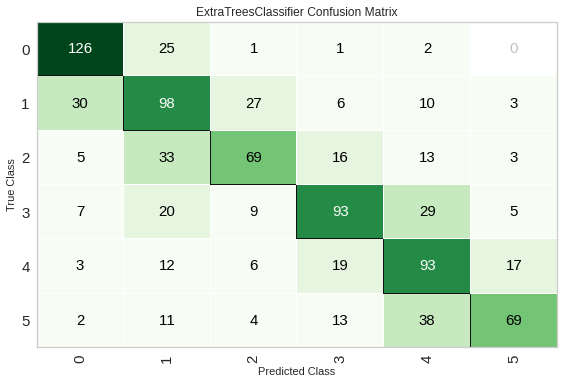

In [11]:
# Create Confusion Matrix for the simple model
plot_model(model, plot = 'confusion_matrix')

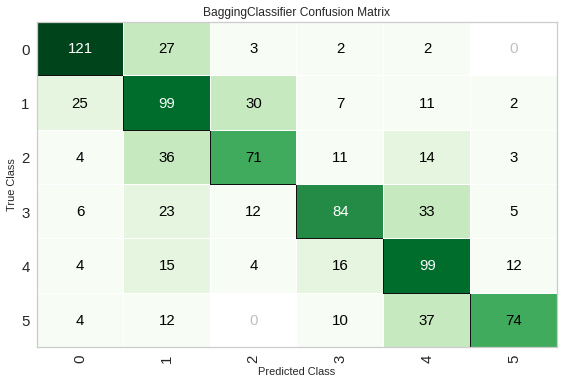

In [12]:
# Create Confusion Matrix for the bagged model to see differences with the basic one and where precision changes
plot_model(bagged_model, plot = 'confusion_matrix')

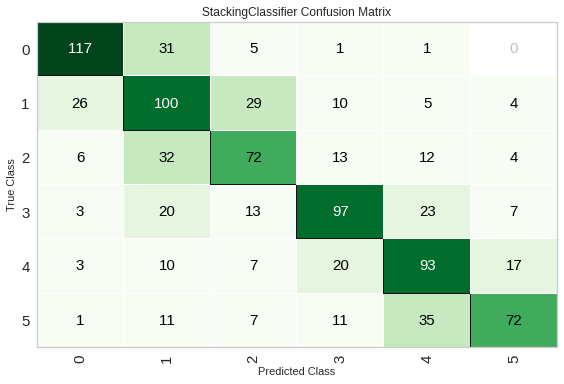

In [13]:
# Create Confusion Matrix for the stacked model (top3)
plot_model(stacker, plot = 'confusion_matrix')